# Convección - difusión en una dimensión

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Parámetros

In [3]:
L  = 1.0           # longitud del sistema 1D
nx = 42            # nodos espaciales
dx = L / (nx-2)    # sí, quitamos dos nodos ...
x = np.linspace( 0 , L , num=nx )

T= 1               # tiempo total
nt = 5000            # pasos temporales
dt = T / nt

c = 2                # velocidad convectiva
D = 1              # difusividad

In [4]:
def chistera(L, x1, x2,nx) :
    u = np.zeros( nx )
    dx = L / (nx-2) 
    n1 = int(x1 / dx)
    n2 = int(x2 / dx)
    u[ n1 : n2 ] = 1
    return u

In [5]:
def gaussiana(L, mean, sigma, nx) :
    u = np.zeros( nx )
    dx = L / (nx-2) 

    for i in range(0,nx):
        x = i * dx - mean
        u[i] = np.exp( - (x/sigma)**2 / 2)

    return u

### Números de Courant

In [6]:
Co_D = D * dt / dx**2
Co_D

0.31999999999999995

In [7]:
Co = c * dt / dx
Co

0.016

In [8]:
Pe = c * L / D
Pe

2.0

### Condiciones iniciales

In [9]:
u0 = chistera(L, -3, L/4,nx)

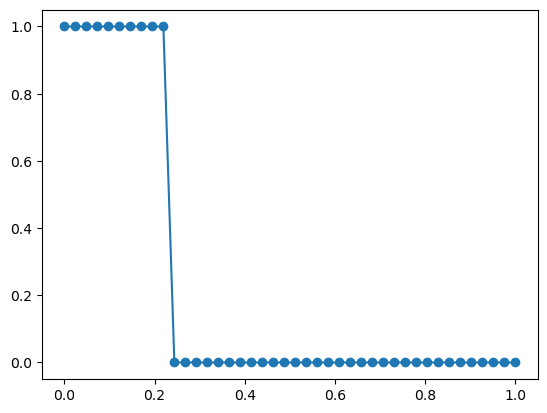

In [10]:
plt.plot( x , u0 , 'o-')

### Un paso en el tiempo

Recordemos que queremos implementar $u_i^{n+1} = u_i^n + \mathrm{Co}_D (u_{i+1}^n +  u_{i-1}^n  - 2 u_i^n)$

Aumentamos nuestro sistema con dos extremos adicionales, que ponemos a 1 y 0 (condiciones de Dirichlet)

In [26]:
u = u0.copy()

In [27]:
u[0] = 1

In [28]:
un = u.copy()         # distribución actual

i=0
u[i] = un[i] + Co_D * (un[i+1] + 1 - 2 * un[i] ) - Co  * (un[i] - 1)

for i in range( 1 , nx -1 ):
   u[i] = un[i] + Co_D * (un[i+1] + un[i-1] - 2 * un[i] ) - Co  * (un[i] - un[i-1])

i = nx -1
u[i] = un[i] + Co_D * ( 0 + un[i-1] - 2 * un[i] ) - Co  * (un[i] - un[i-1])


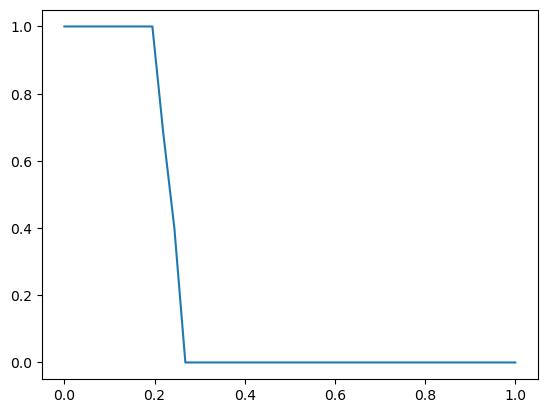

In [29]:
plt.plot( x , u)

### Tiempo completo

In [30]:
c = 10                # velocidad convectiva
D = 1              # difusividad

In [31]:
Co_D = D * dt / dx**2
Co = c * dt / dx
Pe = c * L / D

print('Co_diff = ', Co_D, ' CFL = ', Co, ' Pe = ',Pe)

Co_diff =  0.31999999999999995  CFL =  0.08  Pe =  10.0


In [35]:
u = u0.copy()

In [36]:
for n in range(nt ):
    un = u.copy()
    
    i=0
    u[i] = un[i] + Co_D * (un[i+1] + 1 - 2 * un[i] ) - Co  * (un[i] - 1)
    
    for i in range( 1 , nx - 1 ): 
           u[i] = un[i] + Co_D * (un[i+1] + un[i-1] - 2 * un[i] ) - Co  * (un[i] - un[i-1])

    i = nx -1
    u[i] = un[i] + Co_D * ( 0 + un[i-1] - 2 * un[i] ) - Co  * (un[i] - un[i-1])


In [37]:
uf = u[ 1 : nx +1 ]

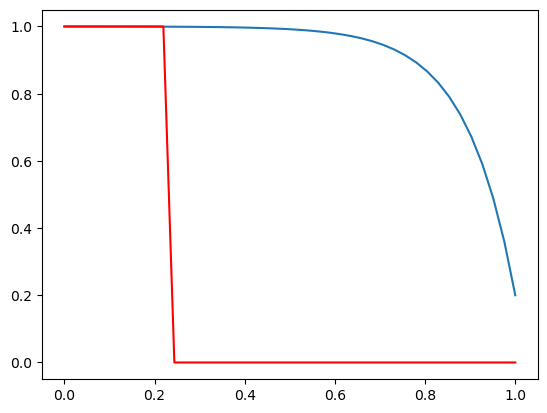

In [39]:
plt.plot(x , u , x , u0 , 'r')

In [40]:
def solucion_analitica(x, P) :
    u = 0 * x
    i = 0
    eP = np.exp(P)
    for xx in x:
        u[i] = (eP - np.exp( P * xx ))/(eP - 1)
        i += 1

    return u

In [41]:
sol = solucion_analitica(x, Pe )

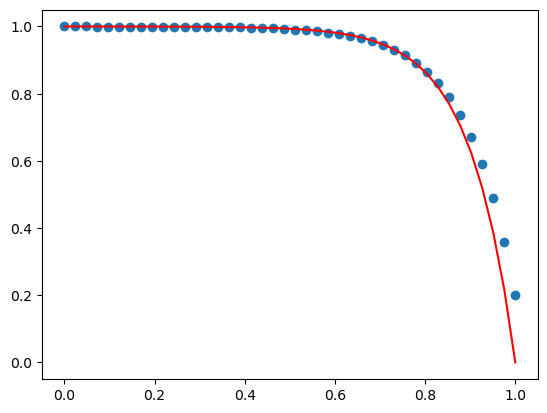

In [42]:
plt.plot(x , u , 'o', x , sol , 'r')